In [1]:
import sys 
import os

if 'fast_shapelets' not in [el.split('/')[-1] for el in sys.path]:
    curr_path = os.getcwd()
    sys.path.append('/'.join((curr_path.split('/')[:-1])))

In [2]:
from src import get_dataset, SAX, FastShapelet
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train,y_train, X_test, y_test = get_dataset('Heartbeat')
y_train = y_train-1
y_test = y_test-1


Unzipping Heartbeat dataset 

Archive:  data/Heartbeat.zip
  inflating: data/Heartbeat/Heartbeat.JPG  
  inflating: data/Heartbeat/Heartbeat.txt  
  inflating: data/Heartbeat/HeartbeatDimension10_TEST.arff  
  inflating: data/Heartbeat/HeartbeatDimension10_TRAIN.arff  
  inflating: data/Heartbeat/HeartbeatDimension11_TEST.arff  
  inflating: data/Heartbeat/HeartbeatDimension11_TRAIN.arff  
  inflating: data/Heartbeat/HeartbeatDimension12_TEST.arff  
  inflating: data/Heartbeat/HeartbeatDimension12_TRAIN.arff  
  inflating: data/Heartbeat/HeartbeatDimension13_TEST.arff  
  inflating: data/Heartbeat/HeartbeatDimension13_TRAIN.arff  
  inflating: data/Heartbeat/HeartbeatDimension14_TEST.arff  
  inflating: data/Heartbeat/HeartbeatDimension14_TRAIN.arff  
  inflating: data/Heartbeat/HeartbeatDimension15_TEST.arff  
  inflating: data/Heartbeat/HeartbeatDimension15_TRAIN.arff  
  inflating: data/Heartbeat/HeartbeatDimension16_TEST.arff  
  inflating: data/Heartbeat/HeartbeatDimension16_TRAI

FileNotFoundError: [Errno 2] No such file or directory: 'data/Heartbeat/Heartbeat_TRAIN.txt'

In [4]:
sax = SAX(13,11)

In [5]:
X_transform = sax.transform(X_train[:100,:])

In [6]:
X_transform.shape

(100, 10)

In [7]:
fs = FastShapelet(3,3)

In [9]:
collision_table = fs._compute_collision_table(X_transform, r=10)

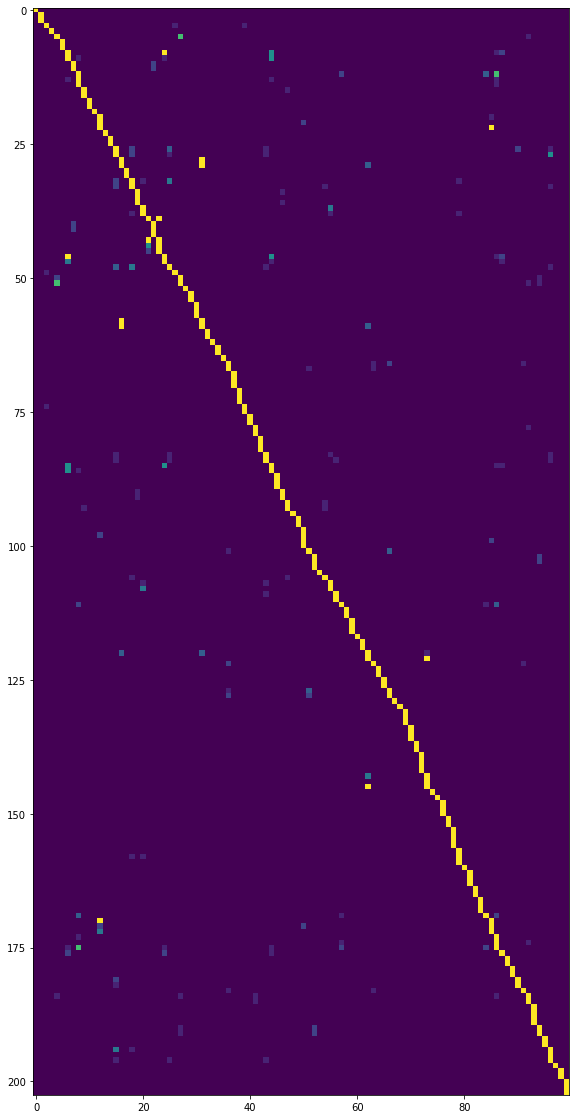

In [10]:
#bigger image
plt.figure(figsize=(20,20))
plt.imshow(collision_table)

In [11]:
distinguishing_score = fs._compute_distinguishing_score(collision_table, y_train[:100])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [6]:
y_train = y_train - 1

In [23]:
obj_classes = y_train[:100]

In [25]:
n_classes = np.unique(obj_classes).shape[0]

        #group collision table cols by class
        
close2ref = np.zeros((collision_table.shape[0], n_classes))        
for cls in np.unique(obj_classes):
    print(cls)
    close2ref[:,int(cls)] = np.sum(collision_table[:,obj_classes == cls], axis=-1)

farRef = np.max(close2ref) - close2ref

np.sum(np.abs(close2ref - farRef), axis=-1)

0.0
1.0
2.0


array([64., 64., 64., 60., 64., 64., 64., 64., 84., 62., 60., 60., 72.,
       58., 62., 62., 64., 64., 64., 64., 62., 60., 44., 64., 64., 64.,
       66., 66., 44., 38., 64., 64., 64., 56., 62., 64., 62., 56., 58.,
       68., 60., 60., 64., 68., 58., 60., 84., 60., 66., 62., 58., 66.,
       64., 64., 64., 64., 64., 64., 44., 38., 64., 64., 64., 64., 64.,
       64., 56., 60., 64., 64., 64., 64., 64., 64., 62., 64., 64., 64.,
       62., 64., 64., 64., 64., 56., 56., 72., 60., 64., 64., 64., 62.,
       62., 62., 60., 64., 64., 64., 64., 60., 60., 64., 56., 60., 60.,
       64., 64., 60., 60., 56., 62., 64., 60., 64., 64., 64., 64., 64.,
       64., 64., 64., 50., 44., 58., 64., 64., 64., 64., 56., 56., 64.,
       64., 64., 64., 64., 64., 64., 64., 64., 64., 64., 64., 64., 64.,
       56., 64., 44., 64., 64., 64., 64., 64., 64., 64., 64., 64., 64.,
       64., 64., 60., 64., 64., 64., 64., 64., 64., 64., 64., 64., 64.,
       60., 44., 56., 56., 62., 60., 76., 58., 64., 64., 64., 64

array([[ 0.,  0., 10.],
       [ 0.,  0., 10.],
       [ 0.,  0., 10.],
       [12.,  0.,  0.],
       [ 0.,  0., 10.],
       [ 0.,  0., 18.],
       [ 0., 10.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 28.],
       [ 0.,  0., 17.],
       [ 0., 12.,  0.],
       [ 0., 12.,  0.],
       [ 0.,  0., 22.],
       [ 0.,  0., 13.],
       [ 0.,  0., 11.],
       [ 0.,  0., 11.],
       [ 0.,  0., 10.],
       [ 0., 10.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 10.],
       [ 1.,  0., 10.],
       [ 2.,  0., 10.],
       [10.,  0., 10.],
       [ 0.,  0., 10.],
       [ 0.,  0., 10.],
       [ 0.,  0., 10.],
       [ 0.,  0., 19.],
       [ 0.,  0., 19.],
       [10.,  0., 10.],
       [10.,  0., 13.],
       [ 0., 10.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 18.],
       [ 1.,  0., 13.],
       [ 0., 11.,  0.],
       [ 0., 10.,  0.],
       [ 0., 11.,  0.],
       [ 0.,  0., 14.],
       [ 0.,  0., 13.],
       [20.,  0.,  0.],
       [ 0., 12.,  0.],
       [ 0., 12.

In [7]:
fs = FastShapelet(3, 10)

In [8]:
shap = fs.fit(X_train[:100,:], y_train[:100])

In [11]:
shap = fs.get_shapelets()

In [14]:
shap

{2: [[array([-0.01298523,  0.01298523]),
   -0.00035209162507401914,
   0.029622063329928672],
  [array([ 0.10601408, -0.10601408]),
   -0.006576840860664346,
   0.11224489795918369],
  [array([ 0.02664021, -0.02664021]),
   -0.008684544625621404,
   0.6161616161616161]],
 3: [[array([ 0.88752545, -1.20634202,  0.31621386]),
   -0.018038025485044296,
   -0.39393939393939403]],
 4: [[array([ 1.20561958, -0.28855829, -1.15036594,  0.23330464]),
   -0.018038025485044296,
   -0.39393939393939403]],
 5: [[array([-0.38225795,  1.13805239, -0.64803329,  0.34004375, -0.43542791]),
   -0.006576840860664346,
   0.11224489795918369],
  [array([-0.3058173 ,  0.83462886, -0.36780024,  0.22273417, -0.38134801]),
   -0.008684544625621404,
   0.6161616161616161],
  [array([ 1.23747837,  0.43183996, -1.14450761, -0.77980183,  0.23565429]),
   -0.018038025485044296,
   -0.39393939393939403]],
 6: [[array([-0.53478867,  1.58769753, -0.55034762, -0.72028436,  0.60660831,
          -0.3745021 ]),
   -0.008

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

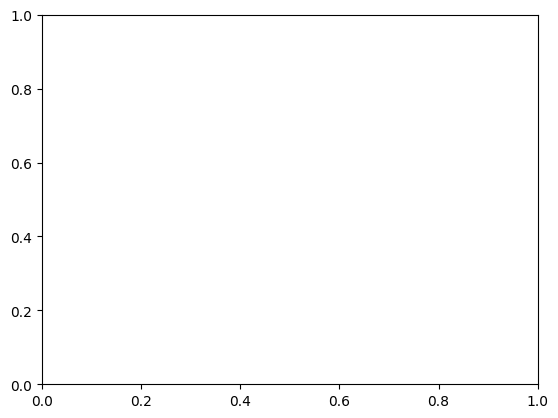

In [24]:
plt.plot(np.arange(4), shap[4][0][2])

In [30]:
shap

{2: [[array([-0.01298523,  0.01298523]),
   -0.00035209162507401914,
   0.029622063329928672],
  [array([ 0.10601408, -0.10601408]),
   -0.006576840860664346,
   0.11224489795918369],
  [array([ 0.02664021, -0.02664021]),
   -0.008684544625621404,
   0.6161616161616161]],
 3: [[array([ 0.88752545, -1.20634202,  0.31621386]),
   -0.018038025485044296,
   -0.39393939393939403]],
 4: [[array([ 1.20561958, -0.28855829, -1.15036594,  0.23330464]),
   -0.018038025485044296,
   -0.39393939393939403]],
 5: [[array([-0.38225795,  1.13805239, -0.64803329,  0.34004375, -0.43542791]),
   -0.006576840860664346,
   0.11224489795918369],
  [array([-0.3058173 ,  0.83462886, -0.36780024,  0.22273417, -0.38134801]),
   -0.008684544625621404,
   0.6161616161616161],
  [array([ 1.23747837,  0.43183996, -1.14450761, -0.77980183,  0.23565429]),
   -0.018038025485044296,
   -0.39393939393939403]],
 6: [[array([-0.53478867,  1.58769753, -0.55034762, -0.72028436,  0.60660831,
          -0.3745021 ]),
   -0.008